# Project: Breast Cancer Detection using Logistic Regression

# Business Understanding


Goal: Predict whether a tumor is malignant or benign using the Breast Cancer dataset from scikit-learn.

Why Important:
Early and accurate breast cancer detection is crucial for improving survival rates and reducing the need for aggressive treatments.
Machine Learning models like Logistic Regression help medical professionals in making faster, data-driven diagnoses.

Success Criteria: Classification model with accuracy above 90%, strong recall for malignant cases, and minimal false negatives to ensure reliable early detection.

# Data Reading

In [58]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Display info
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

# Data Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [45]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [46]:
df.shape

(569, 31)

In [47]:
# Check missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [48]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

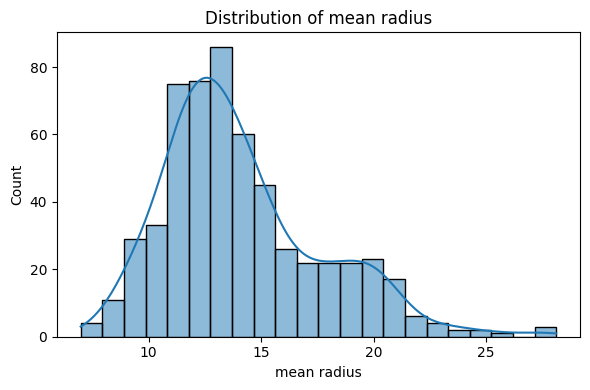

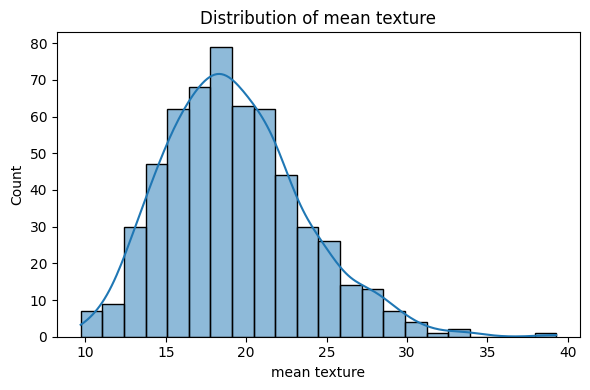

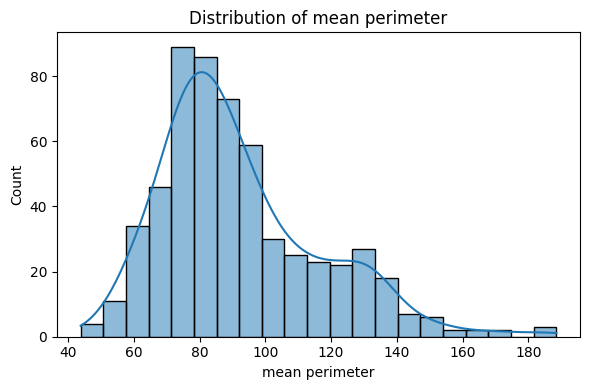

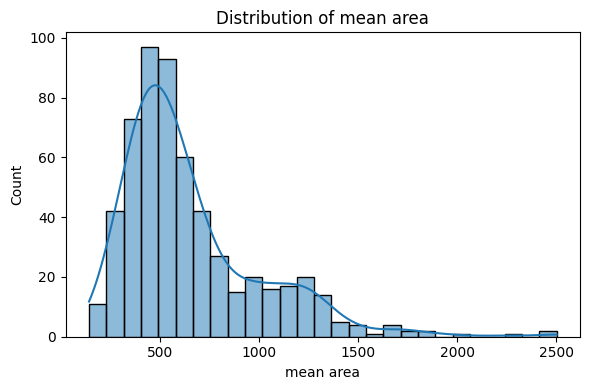

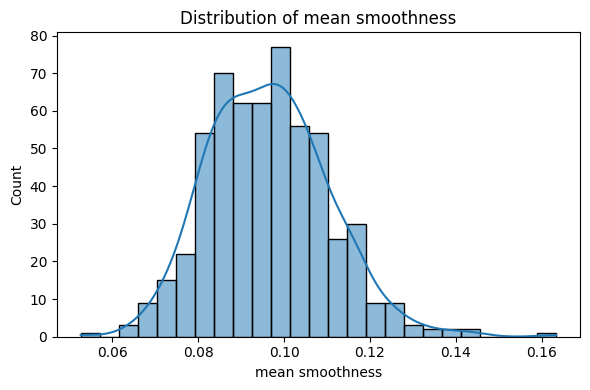

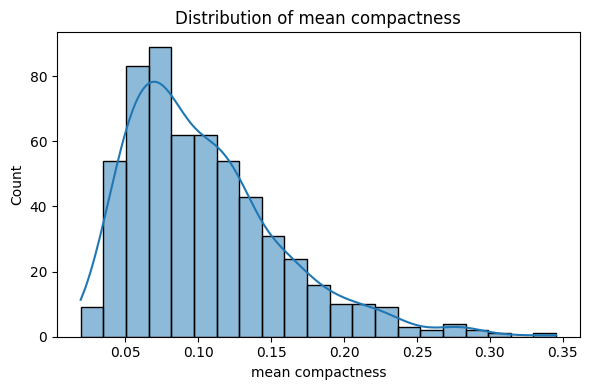

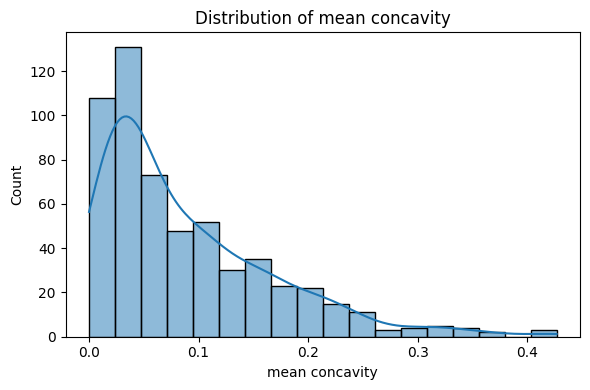

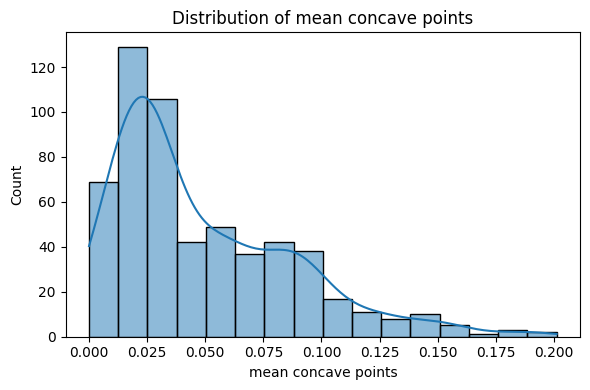

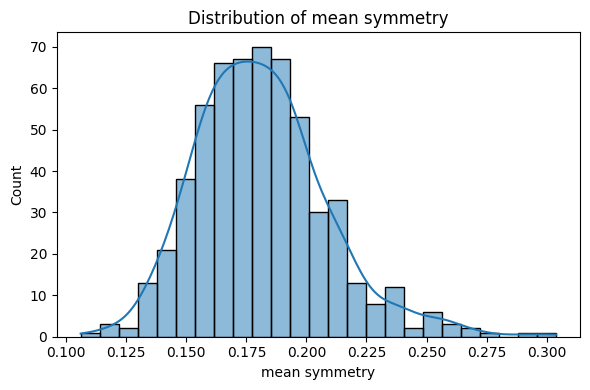

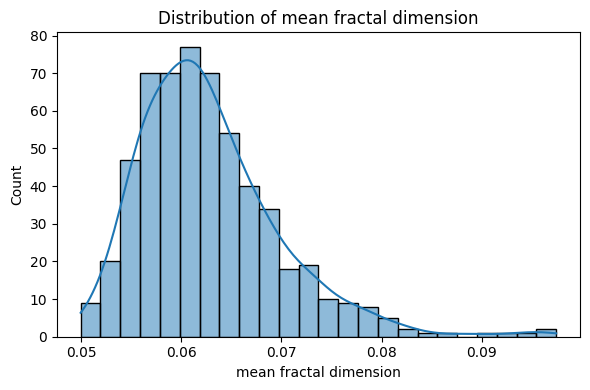

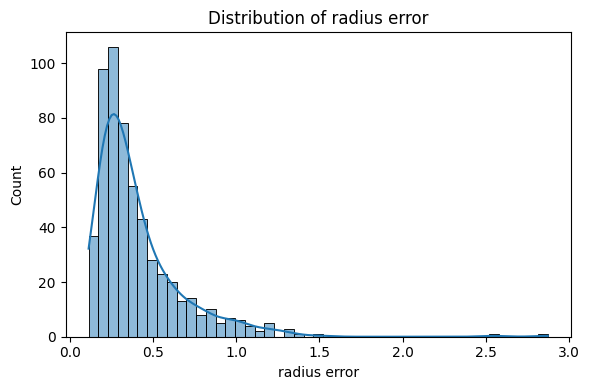

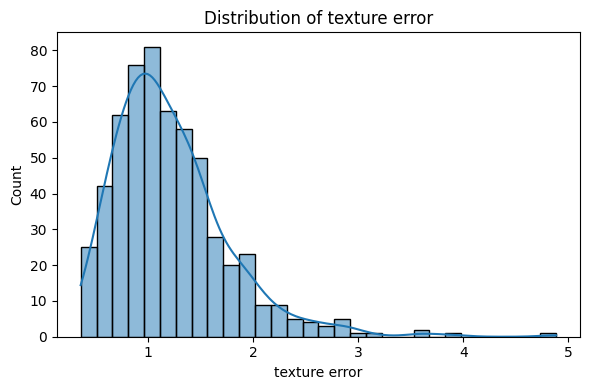

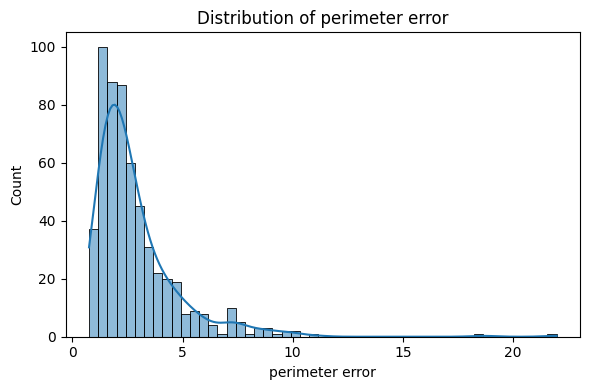

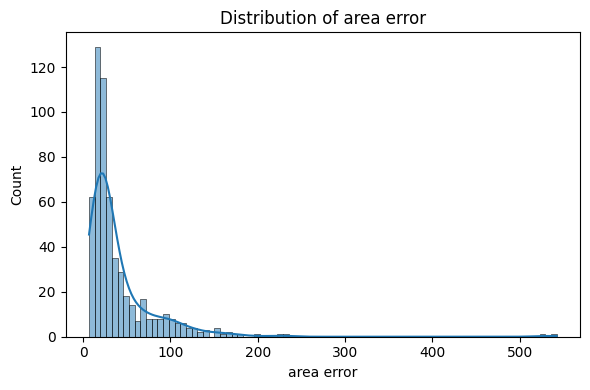

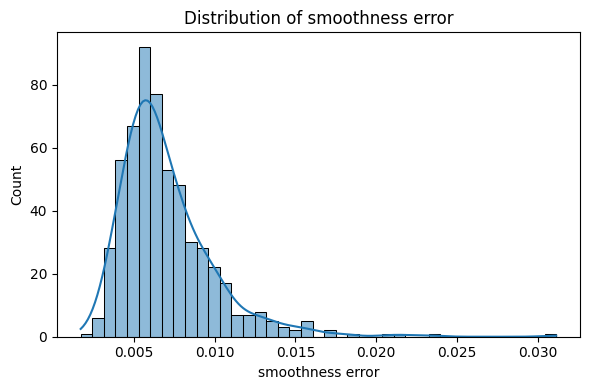

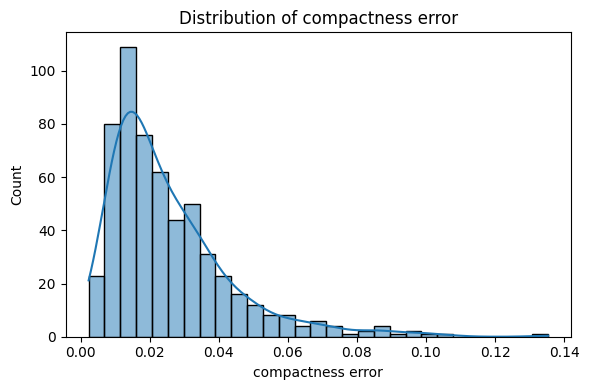

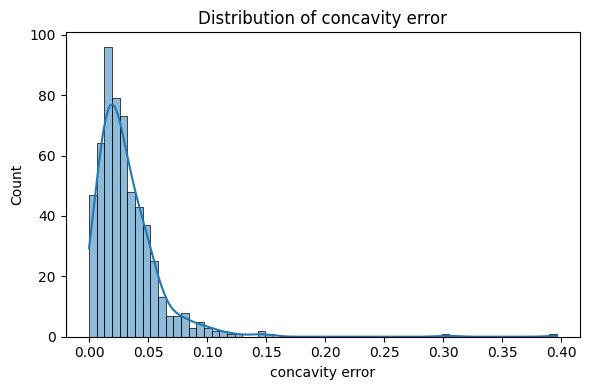

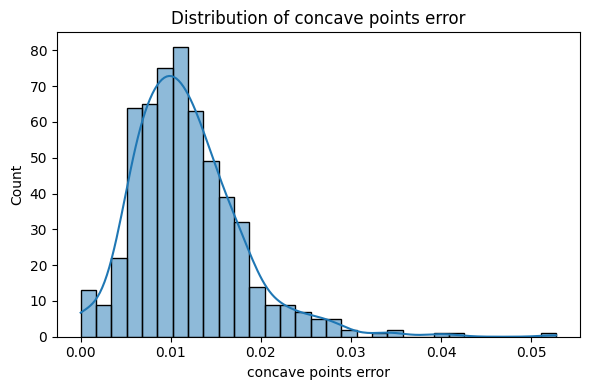

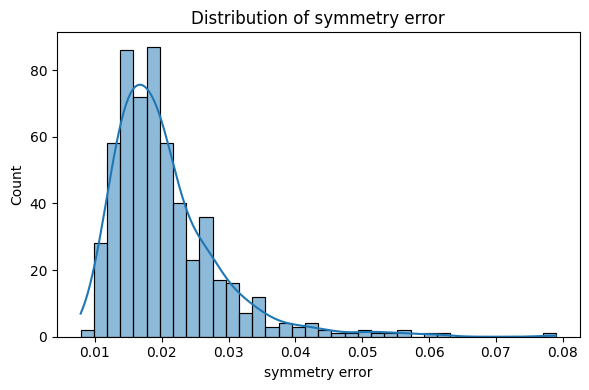

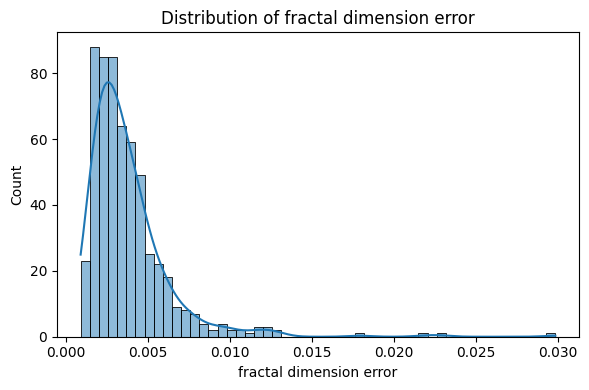

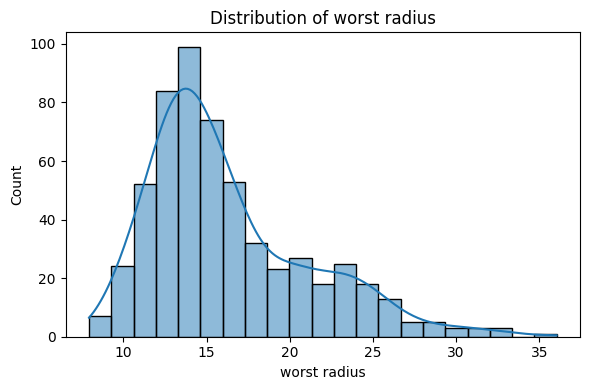

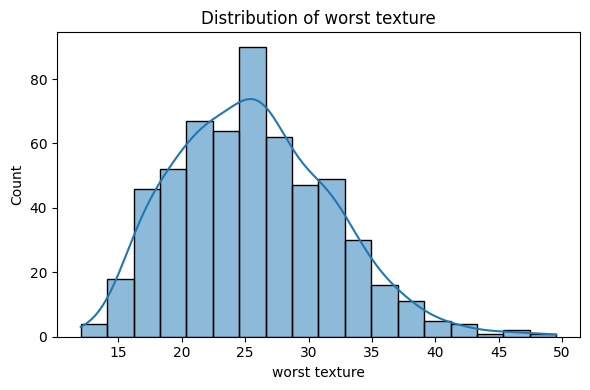

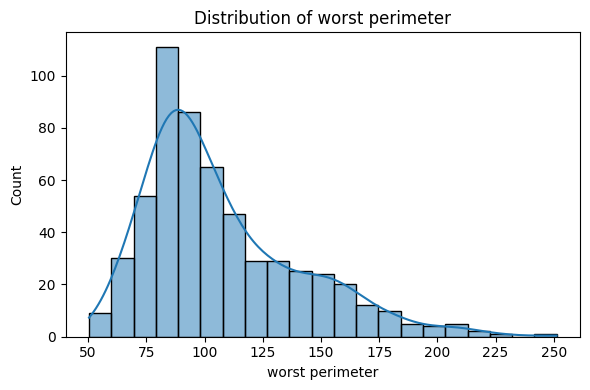

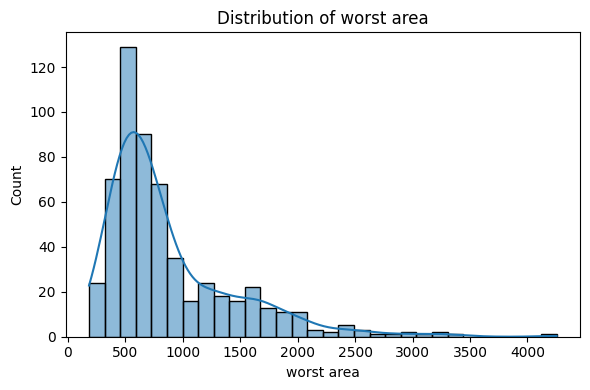

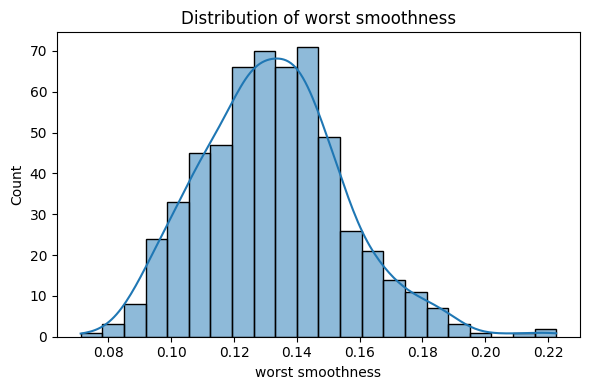

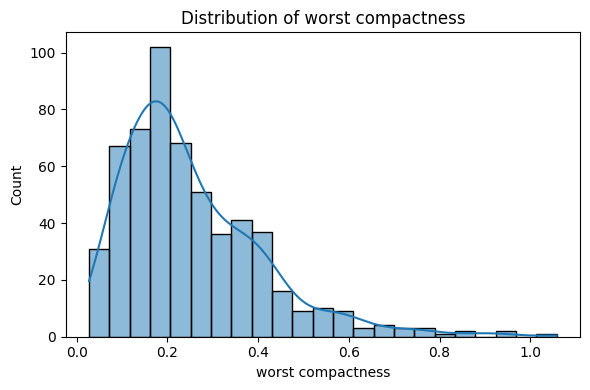

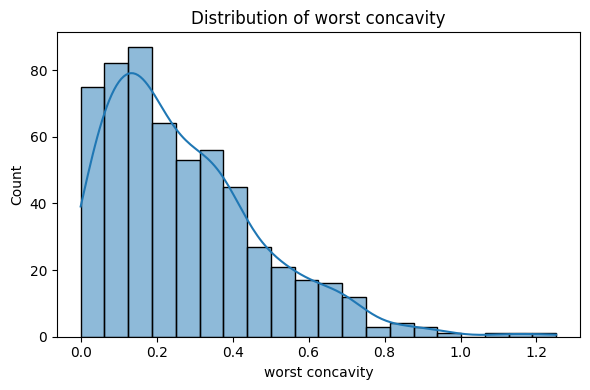

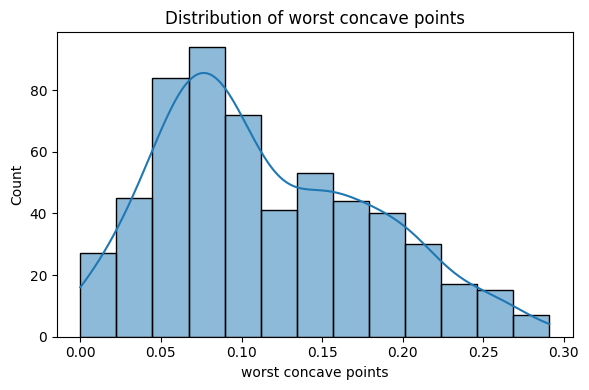

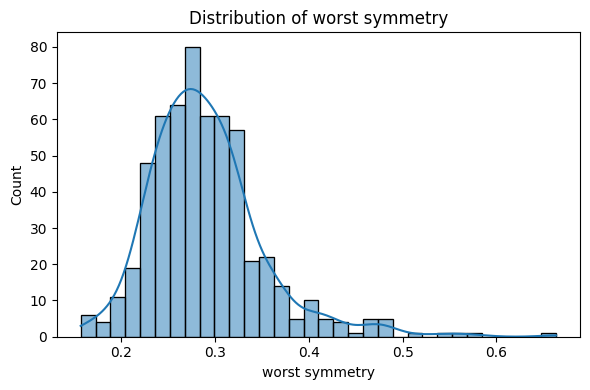

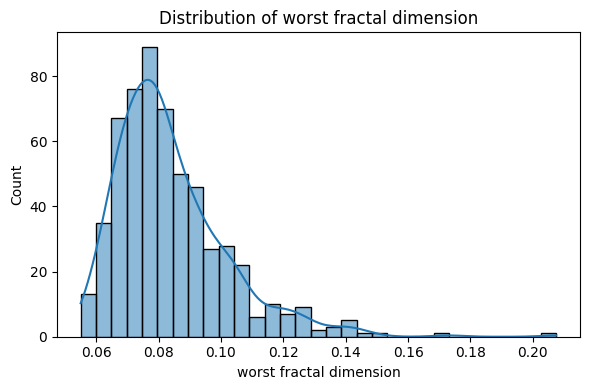

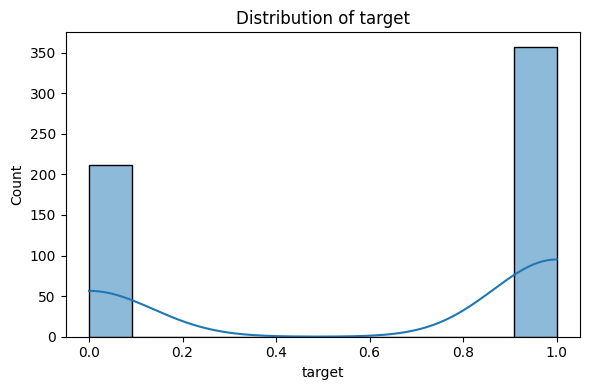

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

#--- Univariate Analysis ---
def univariate_analysis(data):
    for col in data.columns:
        plt.figure(figsize=(6, 4))
        if data[col].dtype == 'object':
            sns.countplot(x=col, data=data)
            plt.title(f'Count Plot of {col}')
        else:
            sns.histplot(data[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

# Run the analysis
univariate_analysis(df)

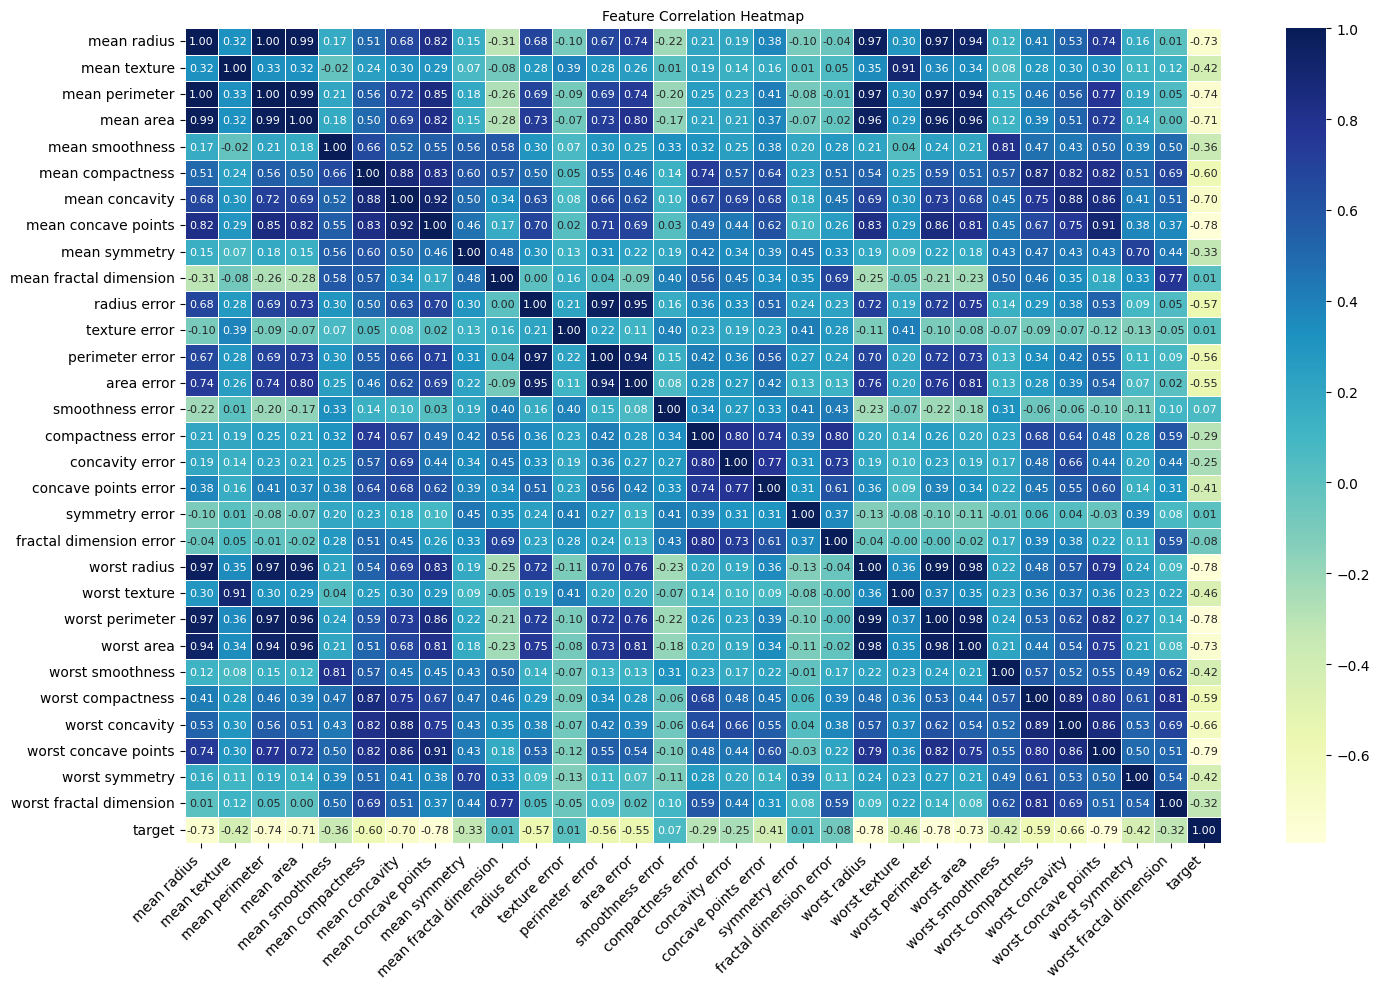

In [55]:
# Compute correlation matrix
co_mtx = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(15, 10))  # ⬅️ make it larger
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True, fmt=".2f",
            linewidths=0.5, annot_kws={"size": 8})

plt.title("Feature Correlation Heatmap", fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

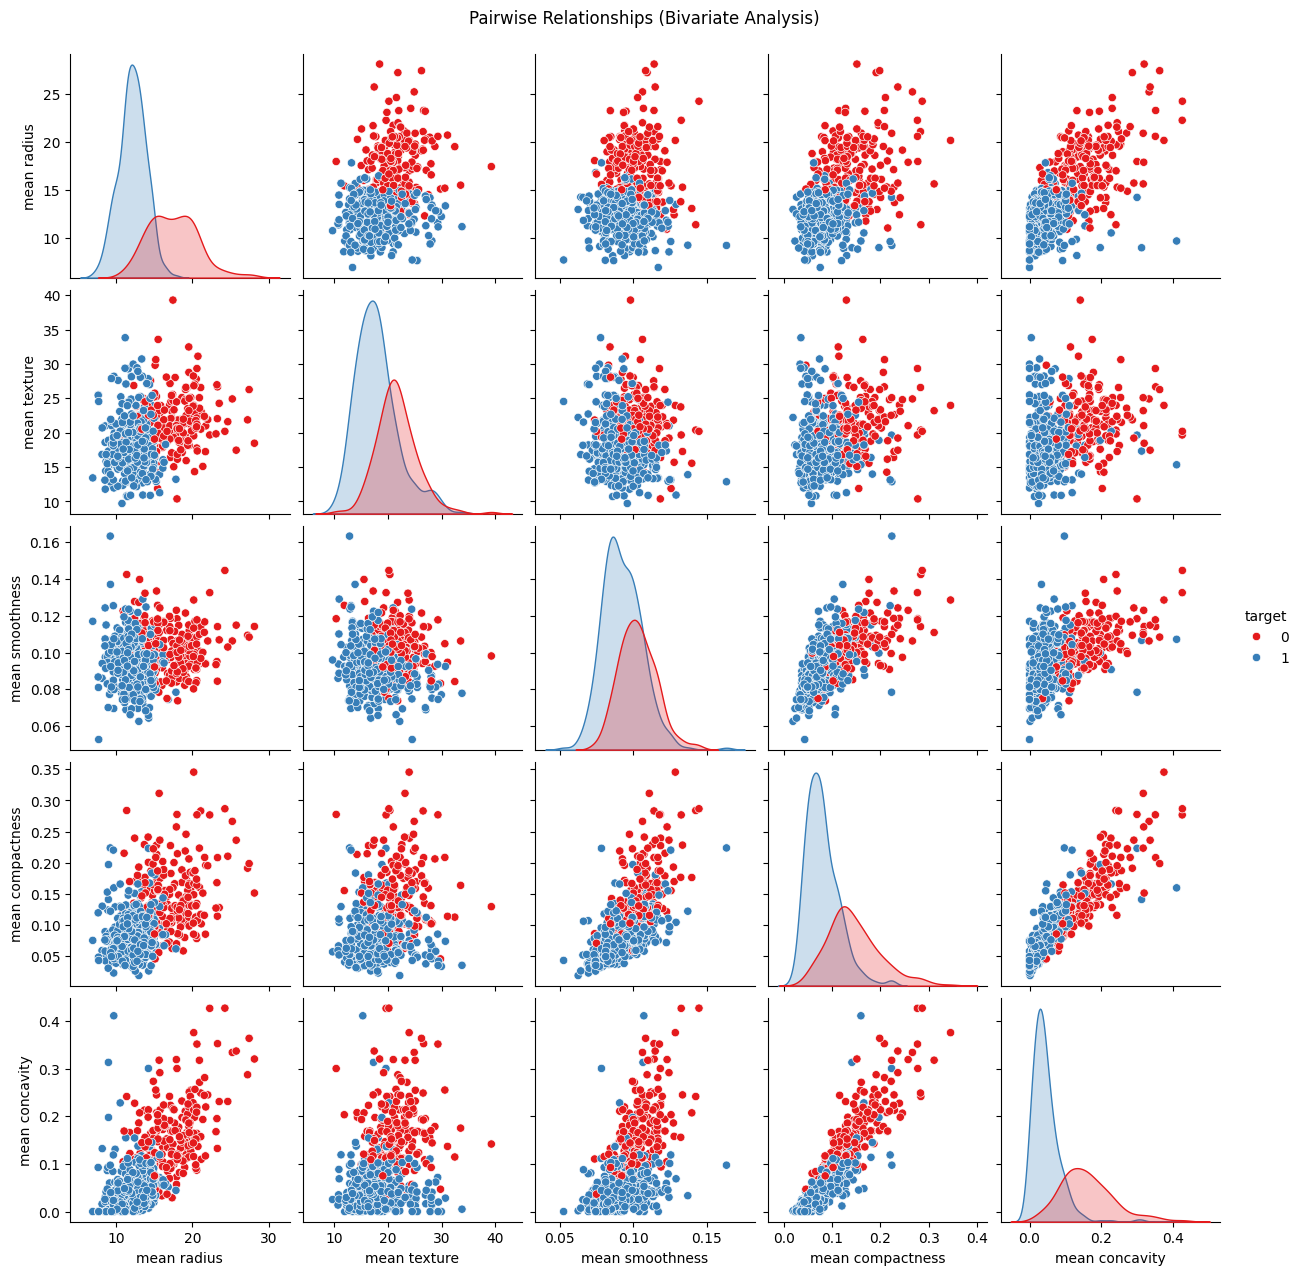

In [51]:
# 2️⃣ Pairplot for selected features vs target
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'target']
sns.pairplot(df[selected_features], hue='target', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Relationships (Bivariate Analysis)", y=1.02)
plt.show()

/tmp/ipython-input-1110384123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='target', data=df, palette='RdBu')  # flipped x and y


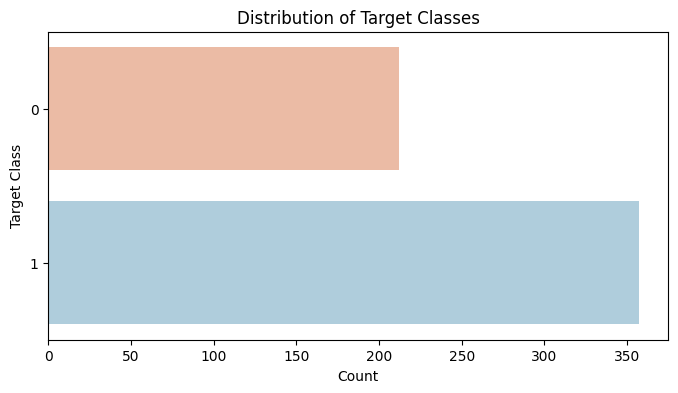

Number of cells labeled Benign:  357
Number of cells labeled Malignant:  212

% of cells labeled Benign: 62.74 %
% of cells labeled Malignant: 37.26 %


In [53]:
# Visualize distribution of classes (flipped axes)
plt.figure(figsize=(8, 4))
sns.countplot(y='target', data=df, palette='RdBu')  # flipped x and y
plt.title('Distribution of Target Classes')
plt.xlabel('Count')
plt.ylabel('Target Class')
plt.show()

# Count number of observations in each class
benign, malignant = df['target'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant: ', malignant)
print('')
print('% of cells labeled Benign:', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant:', round(malignant / len(df) * 100, 2), '%')

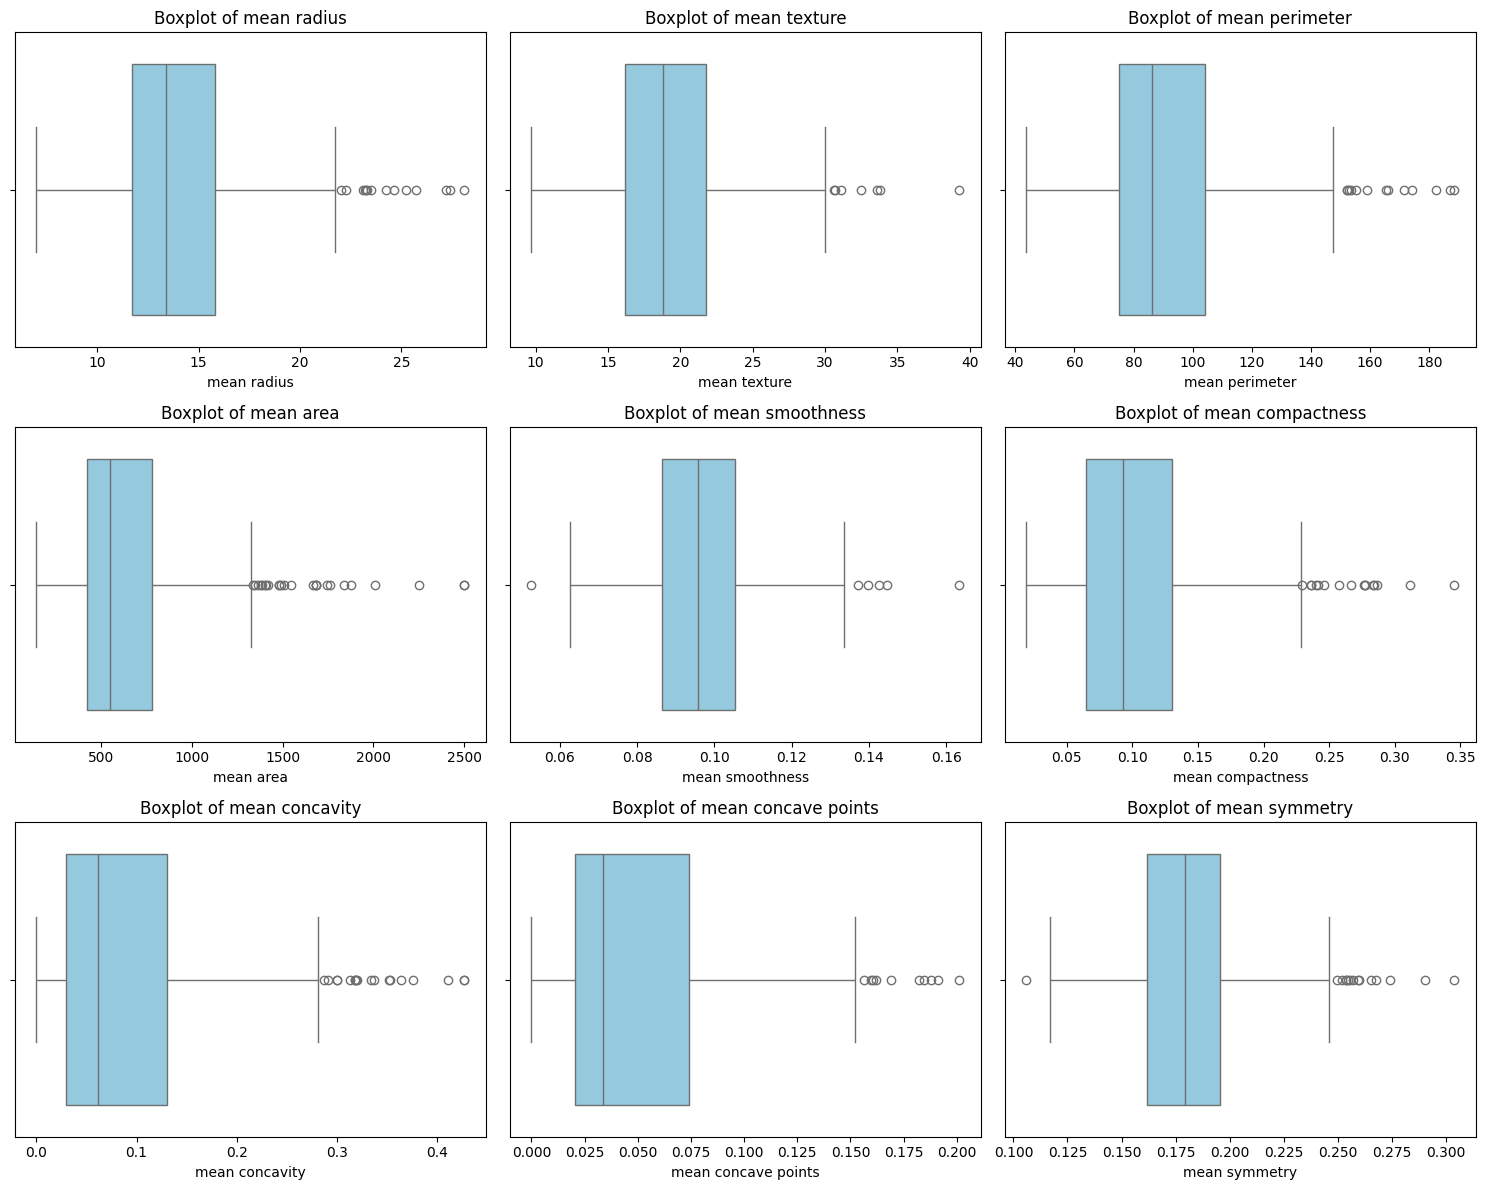

🔎 Outlier count per feature:
area error: 65
radius error: 38
perimeter error: 38
worst area: 35
smoothness error: 30
compactness error: 28
fractal dimension error: 28
symmetry error: 27
mean area: 25
worst fractal dimension: 24
worst symmetry: 23
concavity error: 22
texture error: 20
concave points error: 19
mean concavity: 18
worst radius: 17
mean compactness: 16
worst compactness: 16
mean symmetry: 15
mean fractal dimension: 15
worst perimeter: 15
mean radius: 14
mean perimeter: 13
worst concavity: 12
mean concave points: 10
mean texture: 7
worst smoothness: 7
mean smoothness: 6
worst texture: 5
worst concave points: 0


In [ ]:
# ============================
# Outlier Detection
# ============================

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric features only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('target')  # exclude target column

# 1️⃣ Visual detection using Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:9], 1):  # first 9 features for quick view
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 2️⃣ Quantitative detection using IQR method
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Display features with most outliers
outlier_summary = {k: v for k, v in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True)}
print("🔎 Outlier count per feature:")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count}")

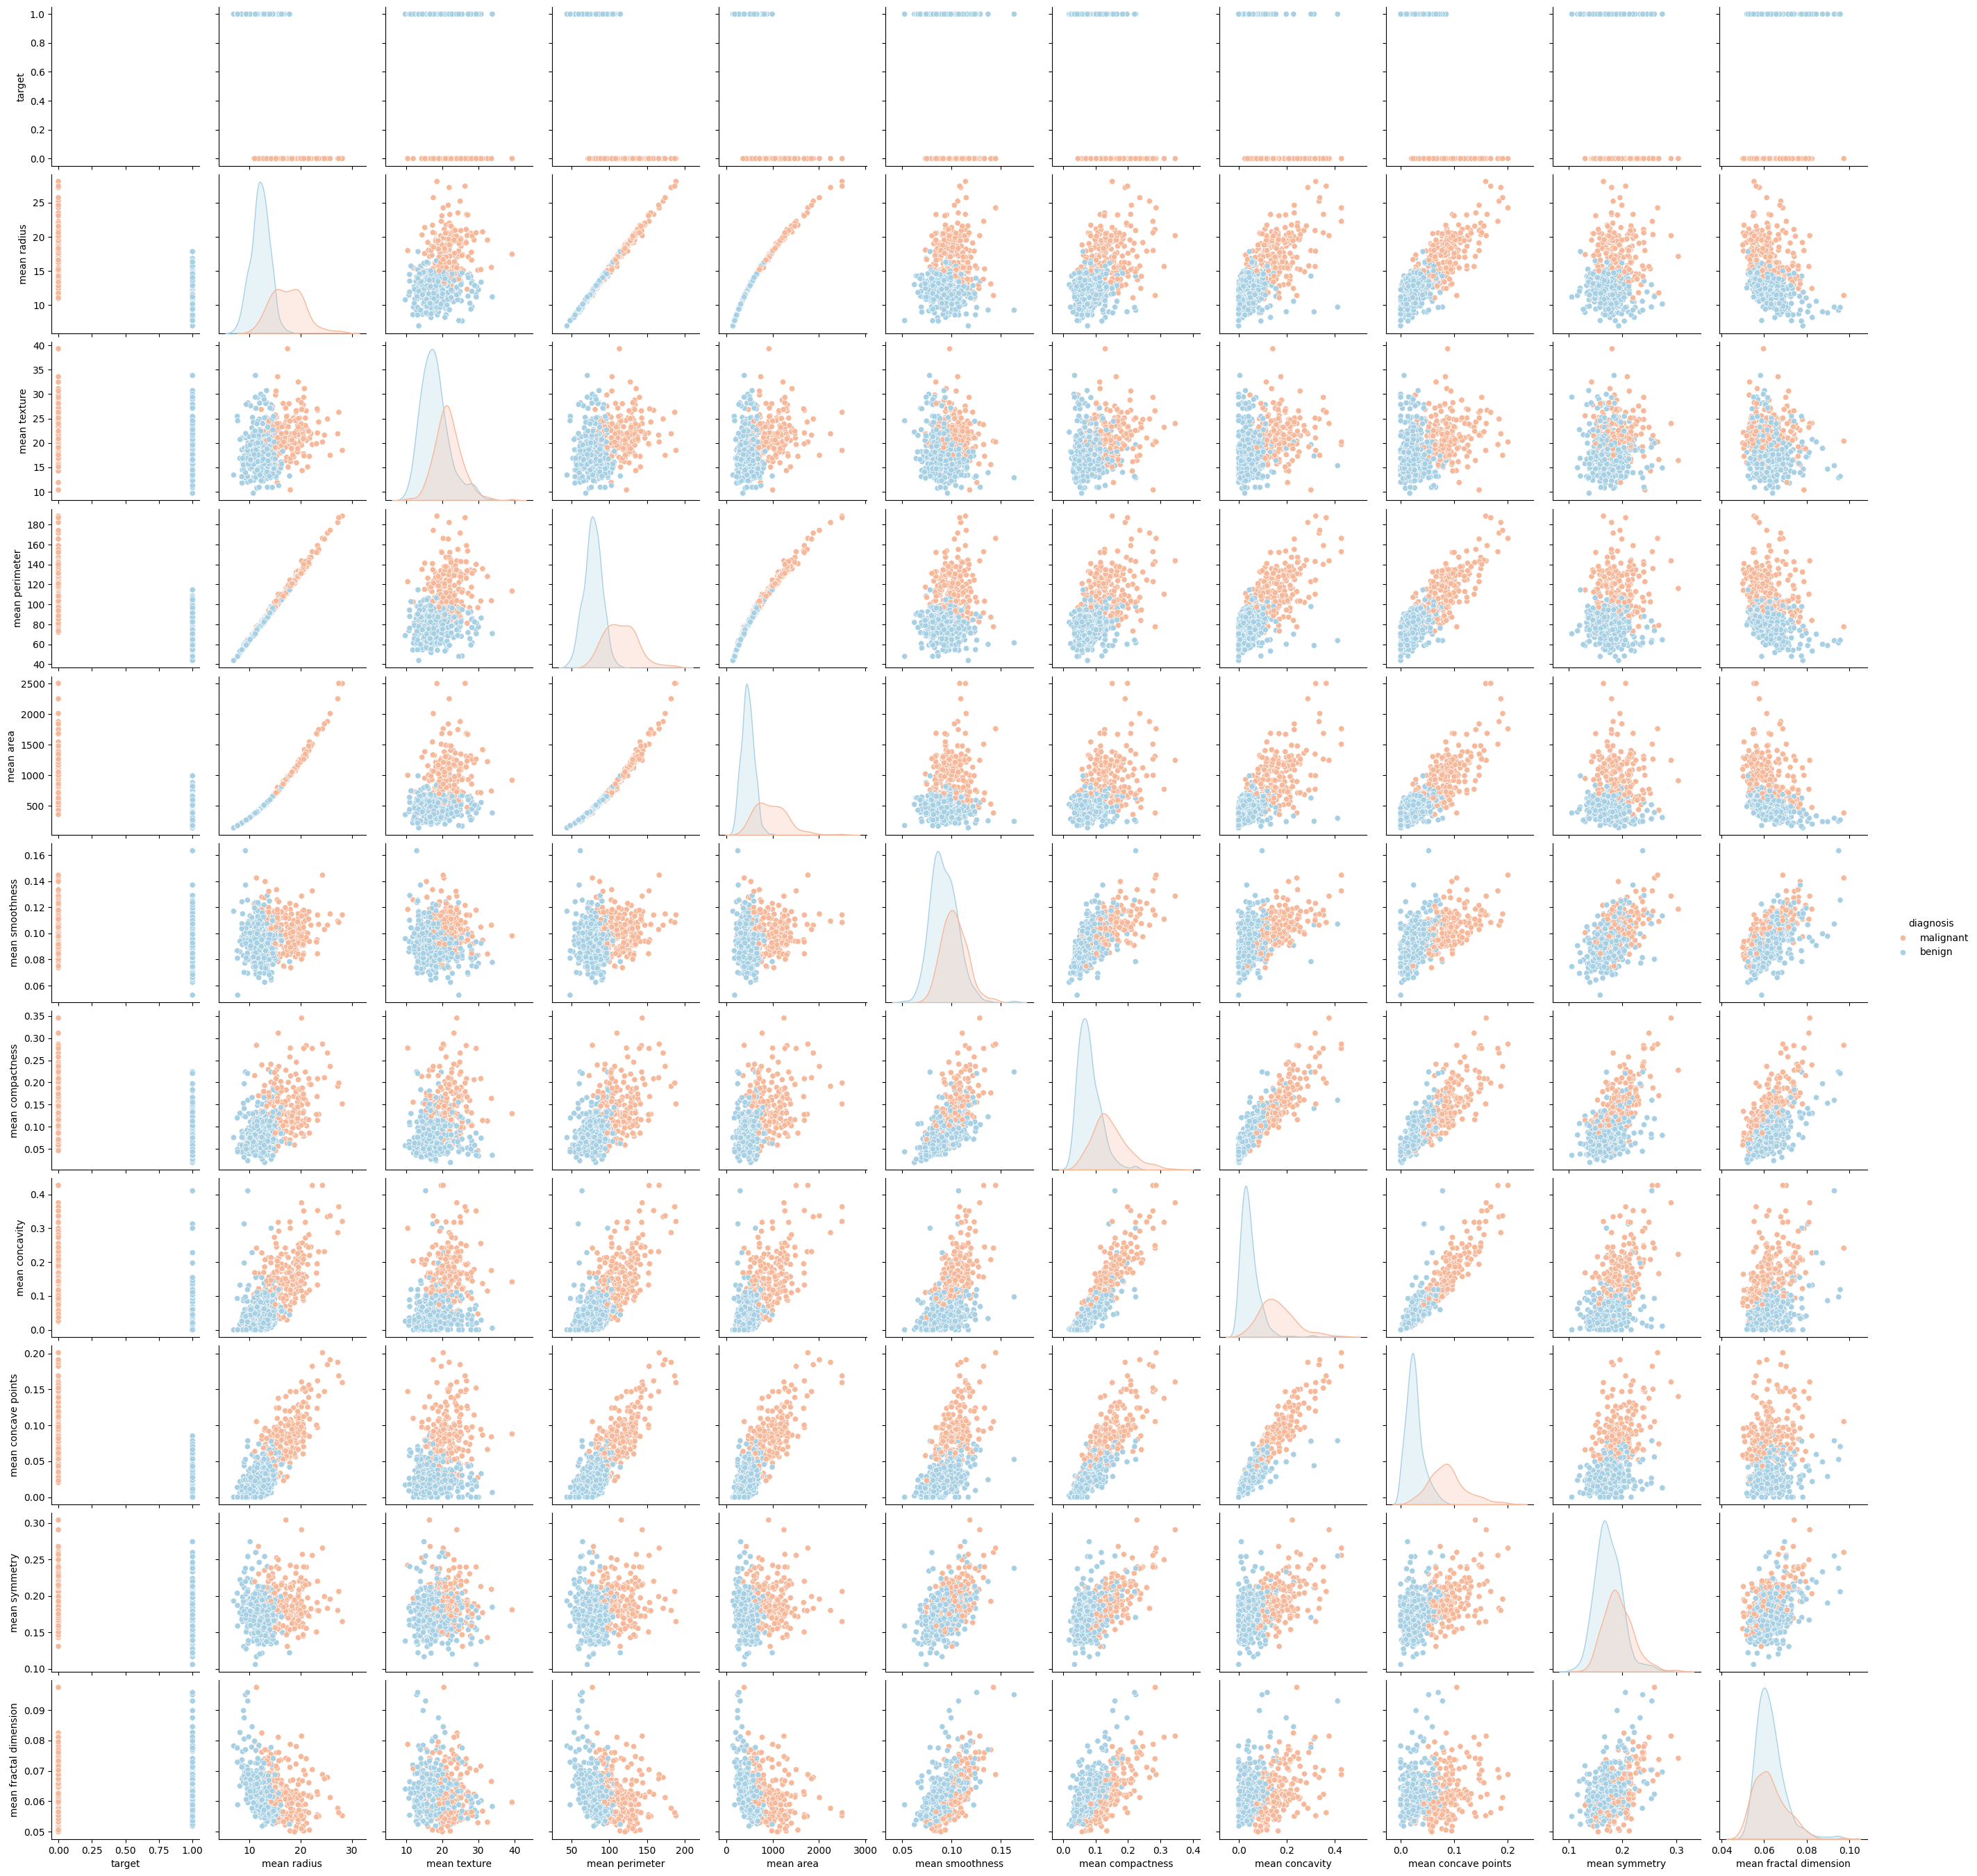

In [ ]:
# ✅ Pairplot for exploring relationships between mean features and diagnosis
cols = [
    'target',
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean area',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'mean symmetry',
    'mean fractal dimension'
]

# Convert numeric target to labels for readability
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

# Plot pairplot
sns.pairplot(data=df[cols + ['diagnosis']], hue='diagnosis', palette='RdBu')

# Logistic Regression

In [59]:
# Importing ML Libraries
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
# Split the data into training and testing sets
X = df.drop(['target'],axis=1)
y = df['target']

In [61]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [63]:
# Standardized X data
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [64]:
# Split the scaled dataset into training and testing sets (70% train, 30% test) with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

In [65]:
# Import model library
from sklearn.linear_model import LogisticRegression

# Create Model
lr = LogisticRegression()

# Train Model
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Model Evaluation Metrics

In [72]:
# Import metrics library
from sklearn.metrics import accuracy_score,classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [85]:
# Evaluation Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.98      0.98      0.98       115

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



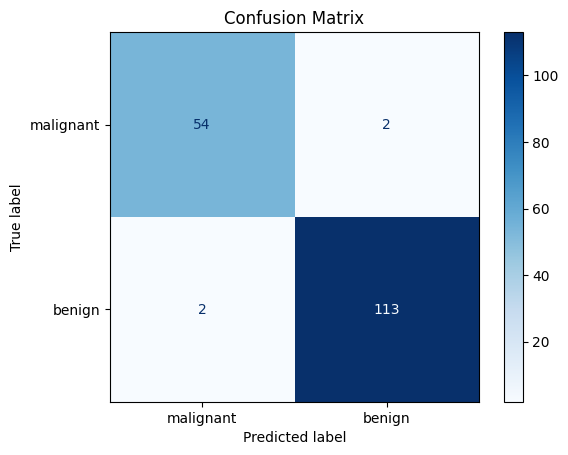

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

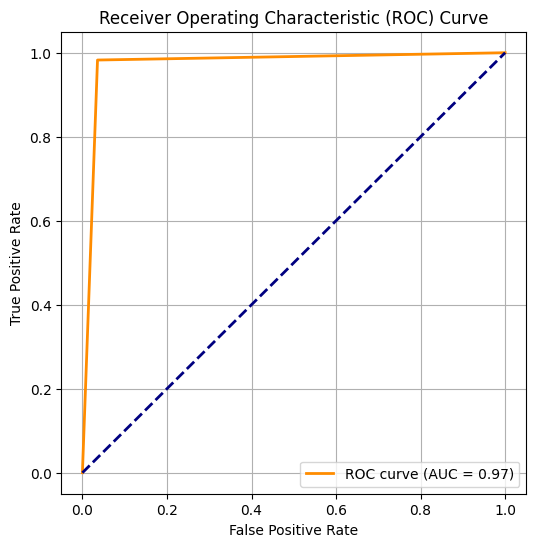

In [88]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Manual Test

In [80]:
# Column names (use exactly as in your dataframe)
cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

# Your manual input values
values = [[
    17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]]

# Create DataFrame
manual_df = pd.DataFrame(values, columns=cols)

# Predict
manual_pred_prob = lr.predict(manual_df)[0]   # extract first value directly
manual_pred_label = 1 if manual_pred_prob > 0.5 else 0

print(f"Predicted Probability: {manual_pred_prob:.3f}")
print(f"Predicted Class: {'Malignant' if manual_pred_label == 0 else 'Benign'}")

Predicted Probability: 0.000
Predicted Class: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Deployment

In [83]:
# Importing Libraries
import gradio as gr
import pandas as pd
import pickle

# Load the trained model from pickle file
with open("breast_cancer_model.pkl", "rb") as f:
    logistic_fit = pickle.load(f)

# Define feature columns (same as training)
cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

# ✅ Prediction function
def predict_breast_cancer(*values):
    df = pd.DataFrame([values], columns=cols)
    prob = logistic_fit.predict(df)[0]
    label = "Malignant" if prob > 0.5 else "Benign"
    return f"🩺 Prediction: {label}\n\nProbability of Malignant: {prob:.3f}"

# ✅ Gradio Interface
inputs = [gr.Number(label=col) for col in cols]

iface = gr.Interface(
    fn=predict_breast_cancer,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction Result"),
    title="Breast Cancer Prediction (Logistic Regression)",
    description="Enter the 30 feature values to predict whether the tumor is benign or malignant.",
    theme="soft",
    allow_flagging="never"
)

iface.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://74aea58899a9cbb223.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://74aea58899a9cbb223.gradio.live
